# machine learning and clustering


In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
path = r'C:\Users\Javier\Documents\CF Gun Violence\02 Data\Original Data'

In [3]:
df = pd.read_csv(os.path.join(path,'gun_violence_clean.csv'), index_col = False)

In [4]:
df

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,36,482856,2013-03-13,New York,Mohawk,17 W Main St,6,2,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,...,0::68||1::57||2::66||3::67||4::62||5::51||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101.0,51.0
1,83,486623,2013-05-23,Tennessee,Bean Station,1034 Main Street,2,2,http://www.gunviolencearchive.org/incident/486623,http://legacy.wbir.com/story/news/local/hamble...,...,1::72||2::45||4::37,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||3::Female||4::Male,0::Stephen Lovell||1::Richard Alexander Sommer...,4::Armed Robbery,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.dailymail.co.uk/news/article-233016...,35.0,8.0
2,101,487833,2013-06-15,Tennessee,Nashville,135 Brinkhaven Ave,0,4,http://www.gunviolencearchive.org/incident/487833,http://www.timesfreepress.com/news/local/story...,...,0::34||1::14||2::14||3::15||4::39,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Female||2::Female||3::Female||4:...,0::Nicole Luke||1::Keona Luke||2::Deona Luke||...,4::Significant others - current or former,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,51.0,19.0
3,181,492276,2013-08-25,Florida,Lake Butler,1050 Southeast 6th Street,4,1,http://www.gunviolencearchive.org/incident/492276,http://www.usatoday.com/story/news/nation/2013...,...,0::28||1::80||2::66||3::44||4::72,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Rolando Gonzalez-Delgado||1::Marvin Pritche...,4::Co-worker,0::Killed||1::Killed||2::Injured||3::Killed||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/motive-a-mystery-i...,19.0,5.0
4,200,480521,2013-09-19,Illinois,Chicago,1809 W 50th St,0,12,http://www.gunviolencearchive.org/incident/480521,http://www.nydailynews.com/news/national/chica...,...,0::3||1::17||2::15||3::27||4::24||5::21||6::41...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,239279,1080309,2018-03-28,Illinois,Chicago,4400 W Maypole Ave,0,2,http://www.gunviolencearchive.org/incident/108...,https://chicago.suntimes.com/news/man-charged-...,...,0::57||1::25,0::Adult 18+||1::Adult 18+,0::Male||1::Male,1::Kenneth Baines,1::Armed Robbery,0::Injured||1::Injured,0::Victim||1::Subject-Suspect,https://chicago.suntimes.com/news/man-exchange...,10.0,5.0
1055,239297,1079712,2018-03-28,Tennessee,Knoxville,9729 Middlebrook Pike,0,1,http://www.gunviolencearchive.org/incident/107...,https://www.wbir.com/article/news/crime/man-ar...,...,1::30,0::Adult 18+||1::Adult 18+,0::Female||1::Male,1::Antonio Cortez Williams,1::Significant others - current or former,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,https://www.knoxnews.com/story/news/crime/2018...,89.0,7.0
1056,239335,1080691,2018-03-29,Utah,Salt Lake City (Murray),4263 Jummer Way,2,0,http://www.gunviolencearch

In [10]:
# keep only the numerical data
df1 = df.drop(columns =['Unnamed: 0', 'incident_id', 'date','state','city_or_county', 'address', 'incident_url', 'source_url', 'participant_age', 'participant_age_group', 'participant_gender','participant_name', 'participant_relationship', 'participant_status', 'participant_type', 'sources', 'incident_url_fields_missing', 'gun_stolen', 'gun_type', 'incident_characteristics', 'location_description', 'notes'])

In [11]:
df1

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
0,6,2,22.0,43.0110,-75.0058,1.0,101.0,51.0
1,2,2,2.0,36.3474,-83.2849,1.0,35.0,8.0
2,0,4,5.0,36.1646,-86.7771,1.0,51.0,19.0
3,4,1,3.0,30.0194,-82.3278,3.0,19.0,5.0
4,0,12,3.0,41.8030,-87.6699,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...
1054,0,2,7.0,41.8846,-87.7369,1.0,10.0,5.0
1055,0,1,2.0,35.9527,-84.1221,1.0,89.0,7.0
1056,2,0,4.0,40.6871,-111.9010,1.0,35.0,3.0
1057,2,0,10.0,43.2408,-83.4308,1.0,84.0,31.0


In [12]:
# Stating by defining the range of the cluster
num_cl = range(1, 20) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
# Now, create a score for each of the ranges created..
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

C:\Users\Javier\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[-2763102.4857853837,
 -1454684.1889370065,
 -946964.3330462436,
 -721064.9937503587,
 -597591.7915960096,
 -499128.78030899266,
 -440208.1016908999,
 -398283.1607673118,
 -366600.5775195186,
 -340208.42019472196,
 -319551.77266282955,
 -303113.61402100354,
 -283268.80662040523,
 -272206.1550208334,
 -259665.53116858902,
 -245523.7127202583,
 -235225.52168705888,
 -227776.58813996578,
 -221166.07349393686]

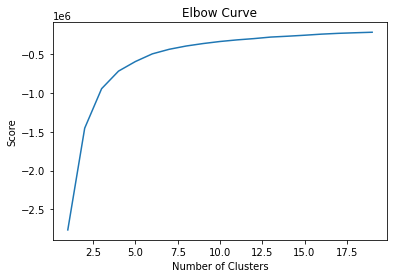

In [14]:
# And finally, create the elbow graph
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Number of clusters

We are getting a value between 2.5 and 5 for the breaking point of our curve. This means I am gonna go with the value of 3 to go with for the amoung of clusters. The df has a ton of information.

# K-means clustering

In [15]:
# First, create the object based on the n° of clusters
kmeans = KMeans(n_clusters = 3) 

In [16]:
# Then fit the K-mean into the DF
kmeans.fit(df1)

KMeans(n_clusters=3)

# Attachting to the df

In [17]:
df1['clusters'] = kmeans.fit_predict(df1)

In [18]:
df1.head()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,clusters
0,6,2,22.0,43.0110,-75.0058,1.0,101.0,51.0,1
1,2,2,2.0,36.3474,-83.2849,1.0,35.0,8.0,0
2,0,4,5.0,36.1646,-86.7771,1.0,51.0,19.0,0
3,4,1,3.0,30.0194,-82.3278,3.0,19.0,5.0,0
4,0,12,3.0,41.8030,-87.6699,1.0,2.0,1.0,0


In [19]:
# Verify if the clusters we correctly assigned with a general view
df1['clusters'].value_counts()

0    668
1    388
2      3
Name: clusters, dtype: int64

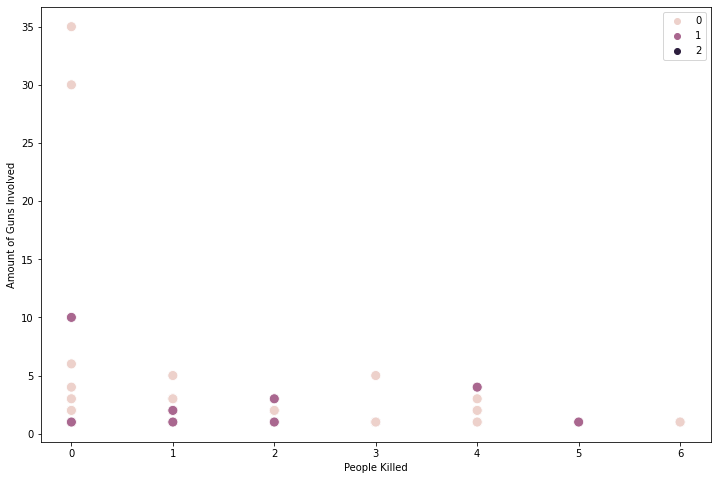

In [21]:
# First we plot people killed and amount of guns involved

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['n_killed'], y=df1['n_guns_involved'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('People Killed') # Label x-axis.
plt.ylabel('Amount of Guns Involved') # Label y-axis.
plt.show()

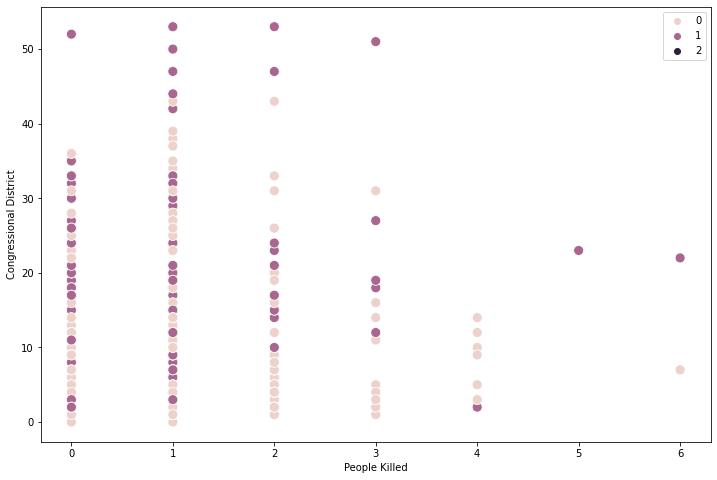

In [22]:
# Then, Congress district and the amount of people killed by guns

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['n_killed'], y=df1['congressional_district'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('People Killed') # Label x-axis.
plt.ylabel('Congressional District') # Label y-axis.
plt.show()

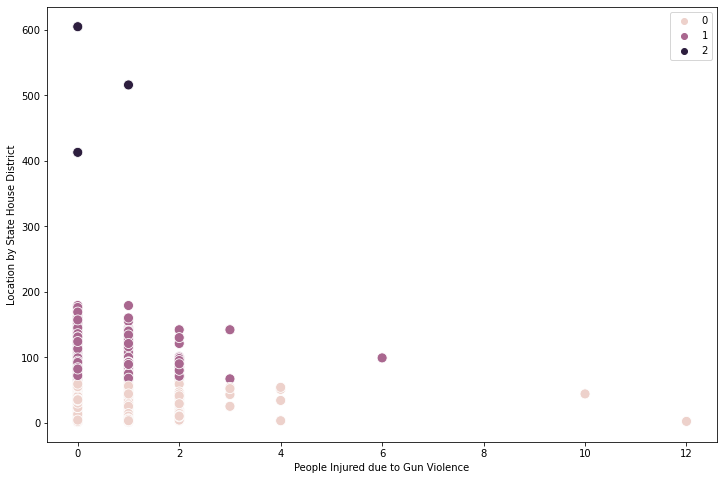

In [24]:
# Lastly the amount of people injured and the state house district

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['n_injured'], y=df1['state_house_district'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('People Injured due to Gun Violence') # Label x-axis.
plt.ylabel('Location by State House District') # Label y-axis.
plt.show()

# Analysis

People Killed and the amount of guns involed: We can see the cluster of 0 has up to 35 guns involved but nobody killed so we can assume that those results are injuries and not deaths. Cluster one has some people killed ranging a lot in the 1 people killed area and up to five people killed mostly with one gun. Cluster 2 I dont see much of on that analysis

Congress District and Amount of People killed: You can easily see already that Cluster 2 has no data in this column but clusters 0 and 1 have a lot of people killed in each congressional district and data is most shown between 1 and 3 people being killed especially between districts 10 and 20 has the most deaths to gun violence. 

Gun violence injury and state house district: We can see cluster 0 has a lot of clusters ranging from 1 injury all the way up to 12 injuries which is a lot but cluster 1 has a lot of points between no injuries and 2 injuries by guns and cluster 2 has only 3 data points on the whole chart between 0 and 1 injury. 

# Grouping

In [26]:
df1.groupby('clusters').agg({'n_injured':['mean', 'median'], 
                         'n_killed':['mean', 'median'], 
                         'n_guns_involved':['mean', 'median']})

n_injured         n_killed        n_guns_involved       
              mean median      mean median            mean median
clusters                                                         
0         0.552395    0.0  0.745509    1.0        1.236527    1.0
1         0.445876    0.0  0.737113    1.0        1.131443    1.0
2         0.333333    0.0  0.333333    0.0        1.000000    1.0

# Grouping Analysis

The information we have from grouping showed that cluster 2 has the least average of people injured and killed and cluster 1 comes second but cluster 0 shows the most violence because the media for guns involved, people killed and injured are all higher than the two other clusters. 